In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,853 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,771 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.21.0 which is incompatible.


In [ ]:
from manim import *
from scipy.stats import norm

Manim Community v0.19.0

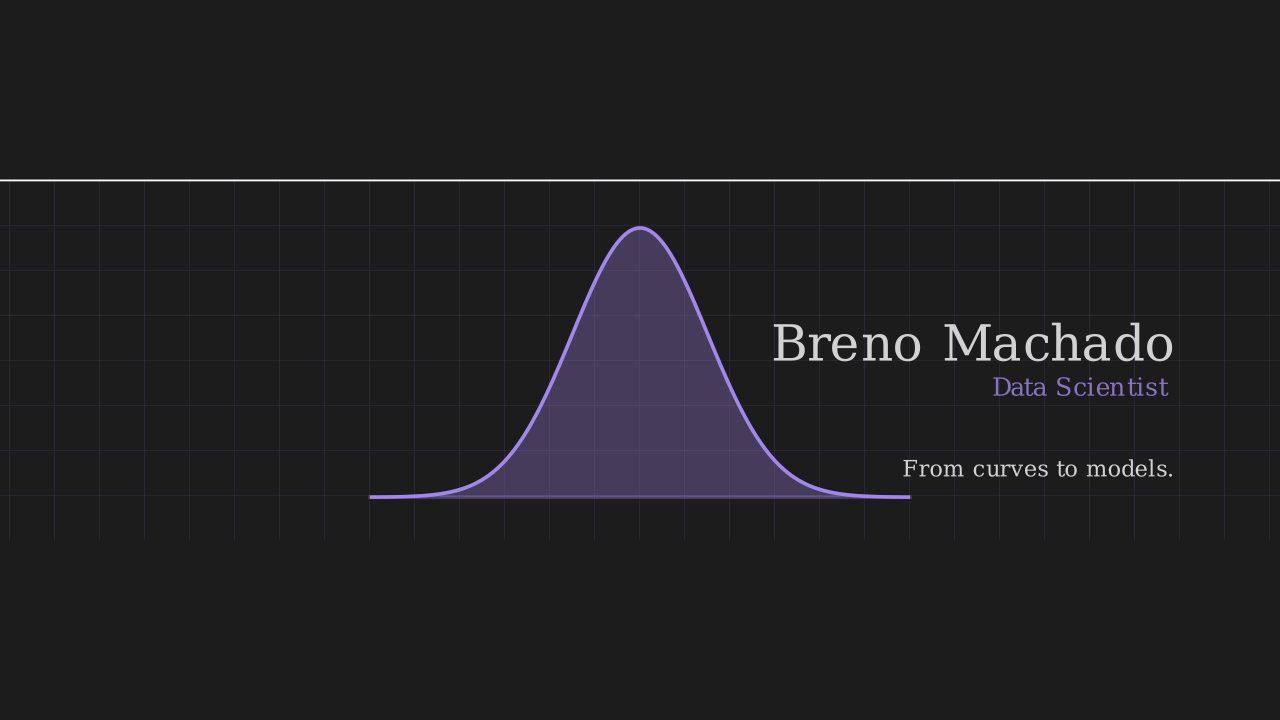

In [ ]:
config.frame_size = [1584,396] # [WIDTH, HEIGHT]
class LinkedInBanner(Scene):
    def construct(self):
        # Background color
        self.camera.background_color = "#1c1c1c"

        phrase1 = Text("Breno Machado", font_size=40, color=WHITE).shift(RIGHT*3 + UP*0.2).set_opacity(0.8)
        phrase2 = Text(r"Data Scientist", font_size=20, color="#a188eb").set_opacity(0.8)
        phrase2.next_to(phrase1, DOWN * 0.7)

        # Create a bell curve (Gaussian function) with opacity
        axes = Axes(
            x_range=[-4, 4, 1],
            y_range=[0, 0.4, 0.2],
            tips=False
        ).set_opacity(0.1).scale(0.5)  # Adjust the position and opacity

        bell_curve = axes.plot(lambda x: norm.pdf(x,0,1), color="#a188eb", stroke_width=4)

        area = axes.get_area(
            bell_curve,
            x_range=(-4,4),
            color=("#a188eb", "#a188eb"),
            opacity=0.3,
        )

        # Fundo quadriculado
        grid = NumberPlane(
          x_range=[-16, 0.01, 0.5],
          y_range=[-4, 0.01, 0.5],
          background_line_style={
            "stroke_color": "#a188eb",
            "stroke_width": 1,
            "stroke_opacity": 0.1
          }
        )

        lines = VGroup()
        for x in [-1, 0, 1]:
            height = np.exp(-x**2)
            line = Line(
                start=[x * 2 + 2, 0, 0],
                end=[x * 2 + 2, height * 2, 0],
                color=GRAY
            )

        funny_func = Text("From curves to models.", font_size=30, color=WHITE).scale(0.6).align_on_border(RIGHT*2.4).set_opacity(0.8).shift(DOWN * 1.2)

        # Add all elements to the scene
        self.add(
            phrase1.shift(RIGHT*0.7),
            phrase2.shift(RIGHT*1.9),
            bell_curve,
            area,
            funny_func,
            grid,
            lines
        )

# don't remove below command for run button to work
%manim -qm -v WARNING LinkedInBanner